In [2]:
import pandas as pd
import time
import matplotlib.pyplot as plt

In [3]:
print(25)

25


In [4]:
def load_diabetes_data(diabetic_data_path: str, ids_mapping_path: str) -> pd.DataFrame:
    """
    Charge les fichiers CSV et effectue un mapping entre admission_type_id et sa description.

    Args:
        diabetic_data_path (str): Chemin du fichier diabetic_data.csv
        ids_mapping_path (str): Chemin du fichier IDS_mapping.csv

    Returns:
        pd.DataFrame: DataFrame fusionné avec la description de l'admission_type_id
    """
    # Charger les fichiers CSV
    diabetic_data = pd.read_csv(diabetic_data_path, dtype=str)
    ids_mapping = pd.read_csv(ids_mapping_path, dtype=str)

    # Renommer la colonne pour correspondre au mapping
    ids_mapping.rename(columns={"admission_type_id": "admission_type_id", "description": "admission_type_desc"}, inplace=True)

    # Fusionner les datasets
    merged_data = diabetic_data.merge(ids_mapping, on="admission_type_id", how="left")

    return merged_data

## Tri merge sort

In [5]:
def merge_sort(arr):
    """
    Trie une liste de tuples (encounter_id, time_in_hospital) en utilisant Merge Sort en place.

    Args:
        arr (list): Liste de tuples (encounter_id, time_in_hospital)
    """
    if len(arr) > 1:
        mid = len(arr) // 2
        left_half = arr[:mid]
        right_half = arr[mid:]

        merge_sort(left_half)
        merge_sort(right_half)

        i = j = k = 0
        while i < len(left_half) and j < len(right_half):
            if left_half[i][1] < right_half[j][1]:  # Trie sur time_in_hospital
                arr[k] = left_half[i]
                i += 1
            else:
                arr[k] = right_half[j]
                j += 1
            k += 1

        while i < len(left_half):
            arr[k] = left_half[i]
            k += 1
            i += 1
        while j < len(right_half):
            arr[k] = right_half[j]
            k += 1
            j += 1

## Tri quick sort

In [6]:
def quick_sort(arr):
    """
    Trie une liste de tuples (encounter_id, time_in_hospital) en utilisant Quick Sort et retourne une nouvelle liste triée.

    Args:
        arr (list): Liste de tuples (encounter_id, time_in_hospital)

    Returns:
        list: Liste triée
    """
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2][1]  # Trier sur time_in_hospital
    left = [x for x in arr if x[1] < pivot]
    middle = [x for x in arr if x[1] == pivot]
    right = [x for x in arr if x[1] > pivot]
    return quick_sort(left) + middle + quick_sort(right)

## Tri tim sort

In [7]:
def insertion_sort(arr, left, right):
    for i in range(left + 1, right + 1):
        temp = arr[i]  # Stocker l'élément actuel (un tuple)
        j = i - 1
        while j >= left and arr[j][1] > temp[1]:  # Comparer selon time_in_hospital
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = temp  # Insérer l'élément au bon endroit


def merge(arr, left, mid, right):
    left_part = arr[left:mid + 1]
    right_part = arr[mid + 1:right + 1]

    i, j, k = 0, 0, left

    while i < len(left_part) and j < len(right_part):
        if left_part[i][1] <= right_part[j][1]:  # Comparaison sur time_in_hospital
            arr[k] = left_part[i]
            i += 1
        else:
            arr[k] = right_part[j]
            j += 1
        k += 1

    while i < len(left_part):
        arr[k] = left_part[i]
        i += 1
        k += 1

    while j < len(right_part):
        arr[k] = right_part[j]
        j += 1
        k += 1


def tim_sort(arr, MIN_RUN):
    n = len(arr)

    for start in range(0, n, MIN_RUN):
        end = min(start + MIN_RUN - 1, n - 1)
        insertion_sort(arr, start, end)

    size = MIN_RUN
    while size < n:
        for left in range(0, n, 2 * size):
            mid = min(left + size - 1, n - 1)
            right = min(left + 2 * size - 1, n - 1)
            if mid < right:
                merge(arr, left, mid, right)
        size *= 2

    return arr

In [13]:
# Paramètres
MIN_RUN = 10

# Charger les données
df = load_diabetes_data(
    "diabetes+130-us+hospitals+for+years+1999-2008/diabetic_data.csv",
    "diabetes+130-us+hospitals+for+years+1999-2008/IDS_mapping.csv"
)

# Convertir la colonne time_in_hospital en int
df["time_in_hospital"] = df["time_in_hospital"].astype(int)

# Créer une liste de tuples (encounter_id, time_in_hospital) pour conserver les ID
encounter_time_list = list(zip(df["encounter_id"], df["time_in_hospital"]))

# Merge Sort (modifie la liste en place)
sorted_merge = encounter_time_list.copy()
start_time = time.time()
merge_sort(sorted_merge)
merge_sort_time = time.time() - start_time

# Quick Sort (retourne une nouvelle liste triée)
start_time = time.time()
sorted_quick = quick_sort(encounter_time_list)
quick_sort_time = time.time() - start_time

# Tim Sort
sorted_tim = encounter_time_list.copy()
start_time = time.time()
sorted_tim = tim_sort(sorted_tim, MIN_RUN)
tim_sort_time = time.time() - start_time

# Afficher les 5 derniers éléments triés
print("Les 5 derniers éléments triés (Merge Sort) :", sorted_merge[-5:])
print("Les 5 derniers éléments triés (Quick Sort) :", sorted_quick[-5:])
print("Les 5 derniers éléments triés (Tim Sort) :", sorted_tim[-5:])

# Afficher les temps d'exécution
print(f"Temps d'exécution de Merge Sort : {merge_sort_time:.6f} secondes")
print(f"Temps d'exécution de Quick Sort : {quick_sort_time:.6f} secondes")
print(f"Temps d'exécution de Tim Sort : {tim_sort_time:.6f} secondes")

Les 5 derniers éléments triés (Merge Sort) : [('1810752', 14), ('1810752', 14), ('927786', 14), ('927786', 14), ('927786', 14)]
Les 5 derniers éléments triés (Quick Sort) : [('443811536', 14), ('443811536', 14), ('443842022', 14), ('443842022', 14), ('443842022', 14)]
Les 5 derniers éléments triés (Tim Sort) : [('443811536', 14), ('443811536', 14), ('443842022', 14), ('443842022', 14), ('443842022', 14)]
Temps d'exécution de Merge Sort : 0.926164 secondes
Temps d'exécution de Quick Sort : 0.180686 secondes
Temps d'exécution de Tim Sort : 0.814957 secondes


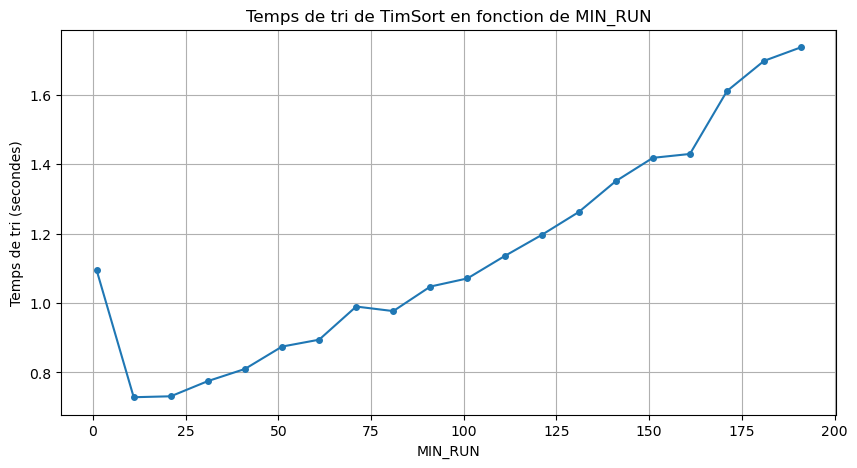

In [9]:
# Liste des valeurs de MIN_RUN
min_run_values = list(range(1, 201, 10))
tim_sort_times = []

# Mesurer le temps de tri pour chaque MIN_RUN
for min_run in min_run_values:
    sorted_tim = encounter_time_list.copy()
    start_time = time.time()
    tim_sort(sorted_tim, min_run)
    tim_sort_times.append(time.time() - start_time)

# Tracer le graphe
plt.figure(figsize=(10, 5))
plt.plot(min_run_values, tim_sort_times, marker='o', linestyle='-', markersize=4)
plt.xlabel("MIN_RUN")
plt.ylabel("Temps de tri (secondes)")
plt.title("Temps de tri de TimSort en fonction de MIN_RUN")
plt.grid(True)
plt.show()